<a href="https://colab.research.google.com/github/marcelonavarrov1/Space-Missions-Analysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

NameError: name 'pd' is not defined

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

NameError: name 'pd' is not defined

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
print(f"1.the shape of the dataframe is {df_data.shape}")
print(f"2.the columns names are:")
for i in df_data.columns:
  print(f" {i}")


df_data.isna().values.any()


1.the shape of the dataframe is (4324, 9)
2.the columns names are:
 Unnamed: 0.1
 Unnamed: 0
 Organisation
 Location
 Date
 Detail
 Rocket_Status
 Price
 Mission_Status


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned.isna().values.any()

False

## Descriptive Statistics

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned.isna().values.any()
df_descriptive_stats = df_cleaned.describe()
print(df_descriptive_stats)



dtype('O')

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()

organisation_df = df_cleaned["Organisation"].value_counts()
g_bar = px.bar(organisation_df,
               x=organisation_df.index,
               y=organisation_df.values,
               title='Number of launches per organisation',
               color='Organisation',
               barmode='group')

g_bar.update_layout(yaxis_title='Number of launches',
                    xaxis={'categoryorder':'total descending'})

g_bar.show()



# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()

status_df = df_cleaned["Rocket_Status"].value_counts()


g_bar = px.bar(status_df,
               x=status_df.index,
               y=status_df.values,
               title='Active Vs Retired Rockets',
               color='Rocket_Status')

g_bar.update_layout(xaxis_title="Status",
                    yaxis_title="",
                    xaxis=dict(tickmode='array',
                    tickvals=[0, 1],
                    ticktext=['Active', 'Retired']))

g_bar.update_coloraxes(showscale=False)

g_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()

g_bar = px.bar(df_cleaned["Mission_Status"].value_counts(),
               x=df_cleaned["Mission_Status"].value_counts().index,
               y=df_cleaned["Mission_Status"].value_counts().values,
               title='Distribution of Mission Status',
               color='Mission_Status')

g_bar.update_layout(xaxis_title="Status",
                    yaxis_title="")
g_bar.update_coloraxes(showscale=False)

g_bar.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64


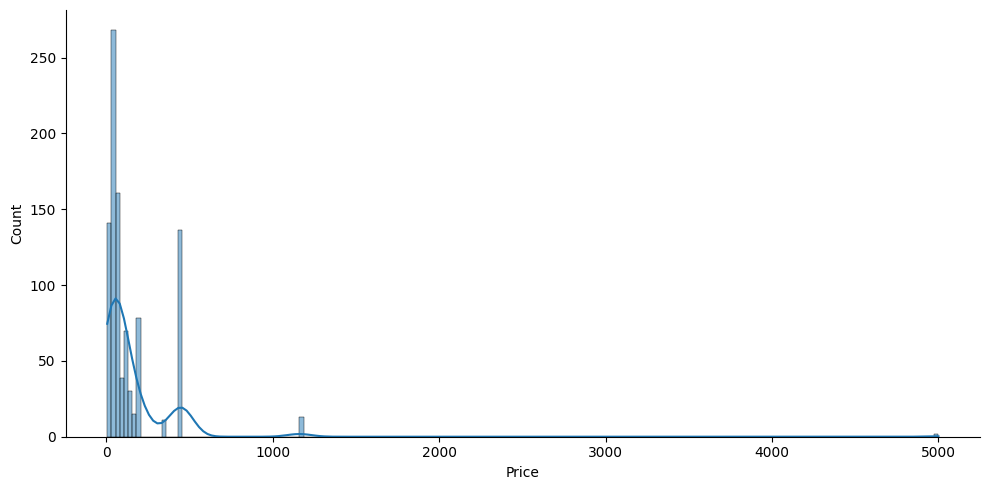

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
print(df_cleaned['Price'].describe())
sns.displot(df_cleaned, x='Price', kde=True, aspect=2)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])

box_plot = px.box(df_cleaned['Price'],
                  title="Distribution of project prices",
                  y="Price")

box_plot.update_layout(
                       yaxis_title="Price in USD Millions",
                       yaxis=dict(type="log"))
box_plot.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

#import the data
pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned["Country"] = df_cleaned["Country"].replace(country_mapping)

def get_country_code(country_name):
    """
    Function to get the ISO 3166-1 alpha-2 code of a country given its name.
    """
    try:
        country = countries.get(country_name)
        if country:
            return country.alpha3
        else:
            return None
    except Exception as e:
        print("Error:", e)
        return None

df_cleaned['iso_aplha'] = df_cleaned['Country'].apply(get_country_code)

df_country_choropleth = df_cleaned.groupby(["iso_aplha"],
                                   as_index=False).agg({"Detail": pd.Series.count})


fig = px.choropleth(df_country_choropleth,
                    locations='iso_aplha',
                    color='Detail',
                    title="Number of launches per country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned["Country"] = df_cleaned["Country"].replace(country_mapping)

def get_country_code(country_name):
    """
    Function to get the ISO 3166-1 alpha-2 code of a country given its name.
    """
    try:
        country = countries.get(country_name)
        if country:
            return country.alpha3
        else:
            return None
    except Exception as e:
        print("Error:", e)
        return None

df_cleaned['iso_aplha'] = df_cleaned['Country'].apply(get_country_code)

df_country_choropleth = df_cleaned.groupby(["iso_aplha","Mission_Status"],
                                   as_index=False).agg({"Detail": pd.Series.count})

df_country_choropleth.loc[df_country_choropleth['Mission_Status'] != 'Success', 'Mission_Status'] = 'Failure'
df_country_choropleth = df_country_choropleth[df_country_choropleth['Mission_Status']=='Failure']


fig = px.choropleth(df_country_choropleth,
                    locations='iso_aplha',
                    color='Detail',
                    title="Number of failures per country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned["Country"] = df_cleaned["Country"].replace(country_mapping)

def get_country_code(country_name):
    """
    Function to get the ISO 3166-1 alpha-2 code of a country given its name.
    """
    try:
        country = countries.get(country_name)
        if country:
            return country.alpha2
        else:
            return None
    except Exception as e:
        print("Error:", e)
        return None

df_cleaned['iso_aplha'] = df_cleaned['Country'].apply(get_country_code)
mission_status = df_cleaned.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Detail":pd.Series.count})
mission_status.sort_values("Detail", inplace=True)


fig = px.sunburst(mission_status,
                  path=['Country', 'Organisation',
                        'Mission_Status'],
                  values='Detail',
                  color='Country',
                  title="Mission Status per country and organisation")


fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])

box_plot = px.box(df_cleaned, x="Organisation", y="Price",
                  color="Organisation",
                  title="Money Spent by Organization on missions")

box_plot.update_layout(xaxis_title="Organisation",
                       yaxis_title="Price",
                       yaxis=dict(type="log"),
                       xaxis={"categoryorder": "total descending"},
                       showlegend=False)
box_plot.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned.head()




,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])

df_money_orga = df_cleaned.groupby(["Organisation"],
                                   as_index=False).agg({"Price": pd.Series.sum})
g_bar = px.bar(df_money_orga,
               x=df_money_orga.Organisation,
               y=df_money_orga.Price,
               title='Money Spent by Organisation per launch',
               color='Organisation',
               barmode='group')

g_bar.update_layout(yaxis_title='Price in USD millions ',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type="log"),
                    showlegend=False)

g_bar.show()

# Chart the Number of Launches per Year

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year

df_year = df_cleaned.groupby(["Year"], as_index=False).agg({"Detail":pd.Series.count})

g_bar = px.bar(df_year,
               x=df_year.Year,
               y=df_year.Detail,
               title='Launches per year')
g_bar.update_layout(yaxis_title="Number of Launches")
g_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)

df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M').astype(str)
df_monthly = df_cleaned.groupby(['YearMonth'], as_index= False).agg({"Detail":pd.Series.count})


g_line = px.line(df_monthly,
                 x='YearMonth',
                 y='Detail',
                 title='Month-on-Month Launches')
g_line.update_layout(xaxis_title='Months per year', yaxis_title='Number of Launches')
g_line.show()

<ipython-input-27-eddd6b692dd4>:17: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)

df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M').astype(str)
df_monthly = df_cleaned.groupby(['YearMonth'], as_index= False).agg({"Detail":pd.Series.count})
df_monthly['Detail'] = df_monthly['Detail'].rolling(window=30).mean()
g_line = px.line(df_monthly,
                 x='YearMonth',
                 y='Detail',
                 title='Month-on-Month Launches rolling avg')
g_line.update_layout(xaxis_title='Months per year', yaxis_title='Number of Launches')
g_line.show()

<ipython-input-5-35005007243e>:17: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Month'] = df_cleaned['Date'].dt.month

df_month = df_cleaned.groupby(["Month"], as_index=False).agg({"Detail":pd.Series.count})


month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df_month['Month'] = df_month['Month'].map(month_names)
g_bar = px.bar(df_month,
               x=df_month.Month,
               y=df_month.Detail,
               title='Launches per Month')
g_bar.update_layout(yaxis_title="Number of Launches")

g_bar.show()

80.33333333333333


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)

df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M').astype(str)
df_monthly_avg_price = df_cleaned.groupby(['YearMonth'], as_index= False).agg({"Price":pd.Series.mean})
g_line = px.line(df_monthly_avg_price,
                 x='YearMonth',
                 y='Price',
                 title='Month-on-Month Price mean')
g_line.update_layout(xaxis_title='Months per year', yaxis_title='Price per launch')
g_line.show()


<ipython-input-43-1c480fb183fc>:17: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year

df_monthly_org = df_cleaned.groupby(['Year','Organisation'], as_index= False).agg({"Detail":pd.Series.count})
g_line = px.bar(df_monthly_org,
                 x='Year',
                 y='Detail',
                 color='Organisation',
                 title='Year Launches per Organisation')
g_line.update_layout(xaxis_title='Months per year', yaxis_title='Number of launches')
g_line.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year

countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned['Country'] = df_cleaned['Country'].replace(country_mapping)

df = df_cleaned[df_cleaned['Year'] <= 1991]
df[df['Country'] != 'USA']

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Country
1794,1794,1794,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1990-10-05 06:14:00+00:00,Long March 2C | FSW-1 No.3,StatusActive,30.80,Success,1990,China
1916,1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15 03:00:00+00:00,Energiya/Buran | Buran,StatusRetired,"5,000.00",Success,1988,Kazakhstan
1932,1932,1932,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1988-08-05 07:29:00+00:00,Long March 2C | FSW-1 No.2,StatusActive,30.80,Success,1988,China
1980,1980,1980,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1987-09-09 07:15:00+00:00,Long March 2C | FSW-1 No.1,StatusActive,30.80,Success,1987,China
1986,1986,1986,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1987-08-05 06:39:00+00:00,Long March 2C | FSW-0 No.9,StatusActive,30.80,Success,1987,China
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15 17:30:00+00:00,Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success,1987,Kazakhstan
2041,2041,2041,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1986-10-06 05:40:00+00:00,Long March 2C | FSW-0 No.8,StatusActive,30.80,Success,1986,China
2101,2101,2101,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1985-10-21 05:04:00+00:00,Long March 2C | FSW-0 No.7,StatusActive,30.80,Success,1985,China
2177,2177,2177,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1984-09-12 05:44:00+00:00,Long March 2C | FSW-0 No.6,StatusActive,30.80,Success,1984,China
2249,2249,2249,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1983-08-19 06:00:00+00:00,Long March 2C | FSW-0 No.5,StatusActive,30.80,Success,1983,China


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned['Country'] = df_cleaned['Country'].replace(country_mapping)

countries_of_interest = ['USA', 'Kazakhstan', 'Russian Federation']
cold_war_df = df_cleaned[df_cleaned['Country'].isin(countries_of_interest)]
cold_war_df.loc[cold_war_df['Country'] != 'USA', 'Country'] = 'USSR'
cold_war_df = cold_war_df[cold_war_df['Year'] <= 1991 ]

cold_war_launches = cold_war_df.groupby(["Country", "Organisation"], as_index=False).agg({"Detail":pd.Series.count})

fig = px.sunburst(cold_war_launches,
                  path=['Country', 'Organisation'],
                  values='Detail',
                  color='Country',
                  title='Launches during cold war')


fig.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned['Country'] = df_cleaned['Country'].replace(country_mapping)

countries_of_interest = ['USA', 'Kazakhstan', 'Russian Federation']
cold_war_df = df_cleaned[df_cleaned['Country'].isin(countries_of_interest)]
cold_war_df.loc[cold_war_df['Country'] != 'USA', 'Country'] = 'USSR'
cold_war_df = cold_war_df[cold_war_df['Year'] <= 1991 ]

cold_war_launches = cold_war_df.groupby(["Country", "Organisation","Year"], as_index=False).agg({"Detail":pd.Series.count})

g_bar = px.bar(cold_war_launches,
                 x='Year',
                 y='Detail',
                 color='Country',
                 title='Year-On-Year launches during the Cold War')
g_bar.update_layout(xaxis_title='Year', yaxis_title='Number of launches')
g_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year

countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned['Country'] = df_cleaned['Country'].replace(country_mapping)

df_mission_status= df_cleaned.groupby(["Year", "Mission_Status"], as_index=False).agg({"Detail":pd.Series.count})
df_failures = df_mission_status[df_mission_status['Mission_Status'] != 'Success']

g_bar = px.bar(df_failures,
                 x='Year',
                 y='Detail',
                 color='Mission_Status',
                 title='Year-On-Year number of failures')
g_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Number',
                    legend_title= "Type:")
g_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned['Country'] = df_cleaned['Country'].replace(country_mapping)

df_mission_status = df_cleaned.copy()
df_mission_status.loc[df_mission_status['Mission_Status'] != 'Success', 'Mission_Status'] = 'Failure'

df_mission_status = df_mission_status.groupby(["Year", "Mission_Status"], as_index=False).agg({"Detail":pd.Series.count})

total_missions_per_year = df_mission_status.groupby('Year')['Detail'].sum()
failed_missions_per_year = df_mission_status[df_mission_status['Mission_Status'] == 'Failure'].groupby('Year')['Detail'].sum()
failure_percentage_per_year = (failed_missions_per_year / total_missions_per_year) * 100
df_failure_percentage_per_year = pd.DataFrame(failure_percentage_per_year)
df_failure_percentage_per_year.reset_index(inplace=True)

g_bar = px.bar(df_failure_percentage_per_year,
                 x="Year",
                 y="Detail",
                 title='Year-On-Year percentage of failures over total number of launches')
g_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Pct',
                    legend_title= "Type:")
g_bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned['Country'] = df_cleaned['Country'].replace(country_mapping)
df_country = df_cleaned.groupby(['Country','Year'], as_index=False).agg({"Detail":pd.Series.count})

g_bar = px.bar(df_country,
               x='Year',
               y='Detail',
               color='Country',
               title='Year-on-Year launches by country')
g_bar.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year


countries_list = []
country_mapping = {
    "Russia": "Russian Federation",
    "Barent Sea": "Russian Federation",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran"
}

for i in df_cleaned["Location"]:
  parts = i.split(',')
  country_name = parts[-1].strip()
  countries_list.append(country_name)
df_cleaned['Country'] = countries_list
df_cleaned['Country'] = df_cleaned['Country'].replace(country_mapping)
df_country = df_cleaned.groupby(['Country','Year', 'Mission_Status'], as_index=False).agg({"Detail":pd.Series.count})
df_country_2 = df_country[df_country['Mission_Status']=='Success']

g_bar = px.bar(df_country_2,
               x='Year',
               y='Detail',
               color='Country',
               title='Year-on-Year launches by country')
g_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta


pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df_cleaned = df_data.dropna().drop_duplicates()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', "")
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['Year'] = df_cleaned['Date'].dt.year

df_monthly_org = df_cleaned.groupby(['Year','Organisation'], as_index= False).agg({"Detail":pd.Series.count})
g_line = px.bar(df_monthly_org,
                 x='Year',
                 y='Detail',
                 color='Organisation',
                 title='Year Launches per Organisation')
g_line.update_layout(xaxis_title='Months per year', yaxis_title='Number of launches')
g_line.show()